                                         Review Text  sentiment
0  Absolutely wonderful - silky and sexy and comf...          1
1  Love this dress!  it's sooo pretty.  i happene...          1
2  I love, love, love this jumpsuit. it's fun, fl...          1
3  This shirt is very flattering to all due to th...          1
4  I love tracy reese dresses, but this one is no...         -1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19818 entries, 0 to 19817
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review Text  19818 non-null  object
 1   sentiment    19818 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 309.8+ KB

Converting text to numerical features using Bag-of-Words...

Model Accuracy: 0.9294

Classification Report:
              precision    recall  f1-score   support

          -1       0.75      0.62      0.68       474
           1       0.95      0.97      0.96      3490

    accuracy       

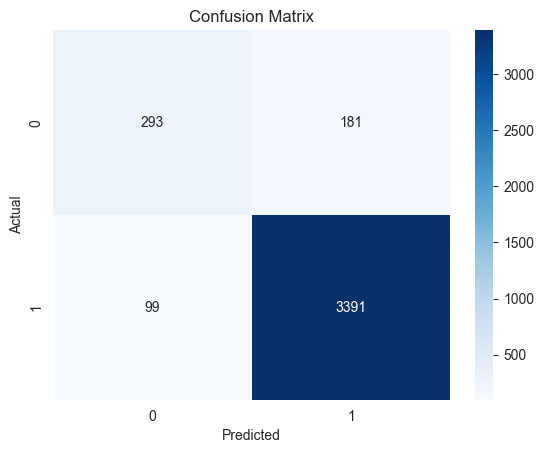


--- New Review Predictions ---

Review 1: This jacket is stylish and very comfortable to wear.
Predicted Sentiment: 1

Review 2: The fabric quality was poor and it didn't fit well.
Predicted Sentiment: -1

Review 3: Love the color and the fit, highly recommend it!
Predicted Sentiment: 1

Review 4: Not happy with this purchase. Returning it.
Predicted Sentiment: 1

--- Prediction Summary ---
Total Positive: 0
Total Negative: 0


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer

sns.set_style('darkgrid')

# Load dataset
df = pd.read_csv('womens_clothing_ecommerce_reviews - womens_clothing_ecommerce_reviews.csv')

# Display basic info
print(df.head())
df.info()

# Drop missing values in 'Review Text' or 'sentiment'
df = df.dropna(subset=['Review Text', 'sentiment'])

# Features and labels
X = df['Review Text']
y = df['sentiment']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print('\nConverting text to numerical features using Bag-of-Words...')

# Initialize CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

# Fit on training data and transform both sets
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Initialize and train logistic regression model
model = LogisticRegression(max_iter=2000)
model.fit(X_train_bow, y_train)

# Predict on test data
y_pred_test = model.predict(X_test_bow)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_test)
print(f'\nModel Accuracy: {accuracy:.4f}')

# Detailed evaluation
print('\nClassification Report:')
print(classification_report(y_test, y_pred_test))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ================== NEW REVIEWS ==================
print("====================================")
new_reviews = [
    "This jacket is stylish and very comfortable to wear.",
    "The fabric quality was poor and it didn't fit well.",
    "Love the color and the fit, highly recommend it!",
    "Not happy with this purchase. Returning it."
]

# Transform new reviews
new_reviews_bow = vectorizer.transform(new_reviews)

# Predict sentiment
new_predictions = model.predict(new_reviews_bow)

# Print predictions
print("\n--- New Review Predictions ---")
for i, (review, pred) in enumerate(zip(new_reviews, new_predictions), 1):
    print(f"\nReview {i}: {review}")
    print(f"Predicted Sentiment: {pred}")

# Count positive and negative predictions
positive_count = sum(1 for pred in new_predictions if str(pred).lower() == 'positive')
negative_count = sum(1 for pred in new_predictions if str(pred).lower() == 'negative')

print("\n--- Prediction Summary ---")
print(f"Total Positive: {positive_count}")
print(f"Total Negative: {negative_count}")
